In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
print("Success")

Success


In [ ]:
df = pd.read_csv("./cleaned_dataset.csv")
print(df.info())

In [4]:
# Data Cleaning
df.drop_duplicates(inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\AviPo\AppData\Local\Temp\ipykernel_3312\3071870802.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Order Date')['Sales'].resample('M').sum().plot()


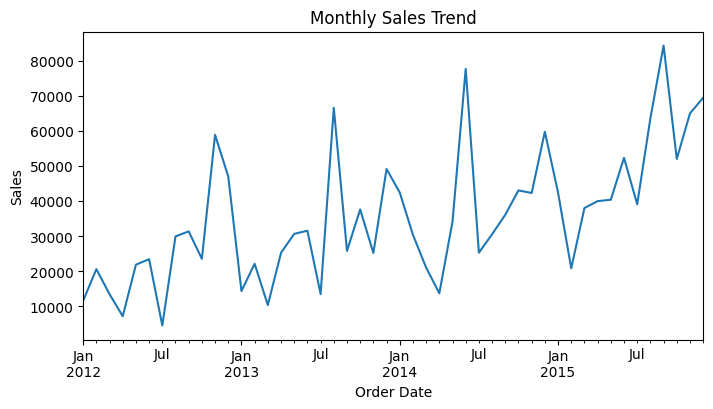

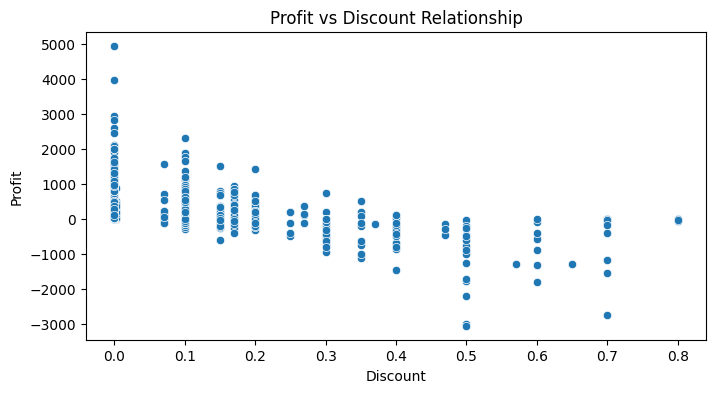

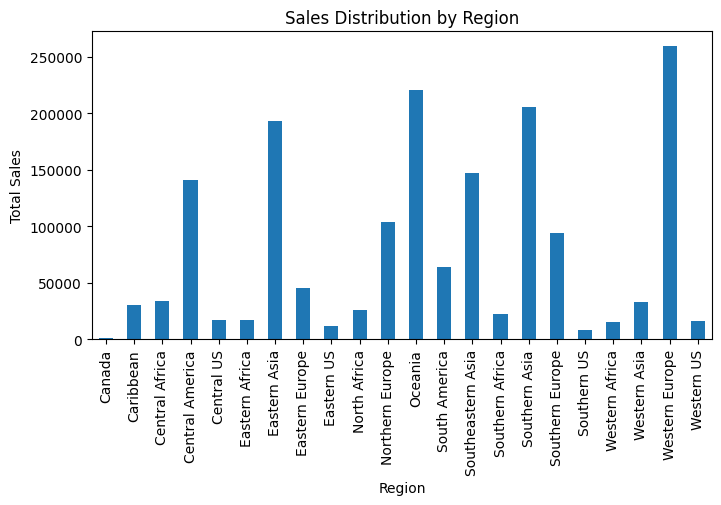

In [5]:
# Visualization
# Time Series Plot
plt.figure(figsize=(8, 4))
df.set_index('Order Date')['Sales'].resample('M').sum().plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()

# Profit vs Discount Scatter
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title("Profit vs Discount Relationship")
plt.show()

# Sales by Region
plt.figure(figsize=(8, 4))
df.groupby('Region')['Sales'].sum().plot(kind='bar')
plt.title("Sales Distribution by Region")
plt.ylabel("Total Sales")
plt.show()


In [6]:
# Predictive Modeling
X = df[['Profit', 'Discount']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(f"\nModel Performance:")
print(f"R² Score: {r2_score(y_test, predictions):.2f}")
print(f"MSE: {mean_squared_error(y_test, predictions):.2f}")



Model Performance:
R² Score: 0.39
MSE: 768263.97
